In [1]:
# Importing relevant libraries.

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import catboost as cat
import lightgbm as lgb
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_auc_score, plot_confusion_matrix, plot_roc_curve 
import gc

In [2]:
# Importing the datasets.

#Train set.
train = pd.read_csv('C:\\Users\\JAHFAITH IROKANULO\\Downloads\\Train.csv')

#Test set
test = pd.read_csv('C:\\Users\\JAHFAITH IROKANULO\\Downloads\\Test.csv')

In [3]:
test_id = test['Applicant_ID']

In [4]:
# Shape of train and test sets.
train.shape, test.shape

((56000, 52), (24000, 51))

## Target Feature.

In [5]:
train['default_status'].value_counts()

no     42285
yes    13715
Name: default_status, dtype: int64

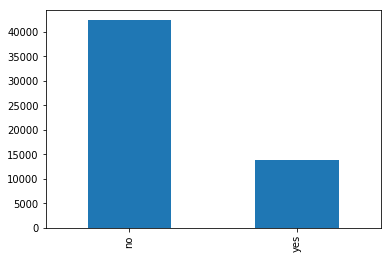

In [6]:
train['default_status'].value_counts().plot(kind='bar')

In [7]:
# Encoding the target variable.

label = LabelEncoder()
train['default_status'] = label.fit_transform(train['default_status'])

In [8]:
train['default_status'].value_counts()

0    42285
1    13715
Name: default_status, dtype: int64

In [9]:
# Concatenating train and test sets.

df = pd.concat([train, test], axis=0)
df.shape

(80000, 52)

In [10]:
# Descriptive Statistics.
df.describe()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50,default_status
count,76361.000000,74447.000000,79499.000000,79499.000000,79499.000000,6.103600e+04,7.260600e+04,6.103600e+04,6.859200e+04,7.949800e+04,...,25422.000000,78099.000000,79182.000000,72255.000000,35145.000000,57211.000000,5.018900e+04,79499.000000,6.414700e+04,56000.000000
mean,3491.942169,0.552815,1.056191,0.854130,2.024495,6.250072e+05,6.844769e+06,2.634964e+06,1.326390e+07,1.186153e+07,...,108.145137,0.368656,6.618305,0.564228,0.070736,0.096135,3.041331e+05,1.053579,6.228580e+05,0.244911
std,189.075233,0.822650,2.163093,3.233269,10.791811,1.440721e+06,1.831476e+07,3.939693e+06,2.076362e+07,2.613218e+07,...,36.663235,0.413222,6.374198,0.196703,0.287365,0.346109,1.717065e+06,1.809372,6.066510e+06,0.430038
min,2986.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.048528,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,3358.000000,0.070050,0.000000,0.000000,0.000000,1.400400e+04,6.830840e+05,1.906100e+05,1.360722e+06,4.411260e+05,...,87.229500,0.000000,2.020000,0.412176,0.000000,0.000000,7.706548e+01,0.000000,4.545456e-02,0.000000
50%,3484.000000,0.269450,0.060000,0.000000,0.000000,1.155330e+05,2.710163e+06,9.639420e+05,5.512519e+06,3.692582e+06,...,118.325250,0.220000,5.050000,0.589624,0.000000,0.000000,3.167076e+02,0.000000,1.697604e-01,0.000000
75%,3620.000000,0.722525,1.289400,0.000000,0.000000,5.225242e+05,7.023687e+06,3.767173e+06,1.705911e+07,1.323592e+07,...,137.459625,0.628573,10.100000,0.754780,0.000000,0.000000,1.167000e+03,1.200961,4.999999e-01,0.000000
max,3900.000000,22.315050,57.371600,206.452800,407.748600,5.313546e+07,2.158794e+09,1.135141e+08,1.443921e+09,2.191361e+09,...,255.000000,2.200000,91.910000,0.800000,5.000000,19.000000,1.213991e+08,28.000000,2.524591e+08,1.000000


In [11]:
# Missing values.
df.isna().sum()

Applicant_ID          0
form_field1        3639
form_field2        5553
form_field3         501
form_field4         501
form_field5         501
form_field6       18964
form_field7        7394
form_field8       18964
form_field9       11408
form_field10        502
form_field11      44819
form_field12      14078
form_field13       8352
form_field14          0
form_field15      32067
form_field16      18510
form_field17      15846
form_field18      14771
form_field19          4
form_field20        502
form_field21      22561
form_field22      29124
form_field23      40248
form_field24      18902
form_field25       7706
form_field26      10610
form_field27      13209
form_field28        502
form_field29        502
form_field30      36417
form_field31      56218
form_field32       7706
form_field33       1751
form_field34        502
form_field35      33014
form_field36       2898
form_field37       7706
form_field38        502
form_field39       6040
form_field40      62557
form_field41    

In [12]:
# Dropping the below features cos more than half of their observations are missing.

df = df.drop(['form_field45', 'form_field40', 'form_field31', 'form_field23', 'form_field11'], axis=1)
df.shape

(80000, 47)

In [13]:
# Filling missing columns with -999 to avoid noise.

df.fillna(value=-999, inplace=True)

df.isna().values.sum()

0

## Treating Categorical variables.

In [14]:
cat = df.select_dtypes(include=object)
cat

,Applicant_ID,form_field47
0,Apcnt_1000000,charge
1,Apcnt_1000004,charge
2,Apcnt_1000008,charge
3,Apcnt_1000012,charge
4,Apcnt_1000016,charge
...,...,...
23995,Apcnt_999940,charge
23996,Apcnt_999956,charge
23997,Apcnt_999976,charge
23998,Apcnt_999984,charge


In [15]:
cat = cat.drop('Applicant_ID', axis=1)
cat.head()

,form_field47
0,charge
1,charge
2,charge
3,charge
4,charge


In [16]:
# Dummifying the cat variable.
cat_dum = pd.get_dummies(cat, drop_first=True)
cat_dum

,form_field47_lending
0,0
1,0
2,0
3,0
4,0
...,...
23995,0
23996,0
23997,0
23998,0


In [17]:
# Joining the dummified cat feature to the main dataset.

df = pd.concat([df, cat_dum], axis=1)
df.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field42,form_field43,form_field44,form_field46,form_field47,form_field48,form_field49,form_field50,default_status,form_field47_lending
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,...,0.392854,2.02,0.711632,0.0,charge,-999.000000,1.129518,0.044335,0.0,0
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,...,0.314281,8.08,0.183584,0.0,charge,349.805730,1.620483,0.322436,0.0,0
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,-999.0,956940.0,-999.0,192944.0,...,0.162965,18.18,0.791136,0.0,charge,-999.000000,1.513370,0.011640,1.0,0
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,...,0.488884,2.02,0.685168,0.0,charge,89.940100,0.664452,0.082729,0.0,0
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,...,0.275000,12.12,0.438168,0.0,charge,97.887502,1.427891,0.045630,0.0,0


In [18]:
df = df.drop('form_field47', axis=1)
df.shape

(80000, 47)

In [19]:
# Engineering new features.
# based on feature importance from catboost.

df['form_field47n1'] = df['form_field47_lending'] * df['form_field1']
df['form_field47nn1'] = df['form_field47_lending'] / df['form_field1']
df['form_field2n6'] = df['form_field6'] * df['form_field2']
df['form_field2nn6'] = df['form_field6'] / df['form_field2']
df['form_field3n25'] = df['form_field3'] * df['form_field25']
df['form_field3nn25'] = df['form_field3'] / df['form_field25']

In [20]:
# Skewness/abnormality.
df.skew()

form_field1              -4.094538
form_field2              -3.388400
form_field3             -12.503422
form_field4             -12.485453
form_field5             -12.147764
form_field6               7.340283
form_field7              32.941666
form_field8               4.330886
form_field9               8.136562
form_field10             15.433010
form_field12              5.901909
form_field13             50.972921
form_field14            105.898366
form_field15              5.671541
form_field16             -1.273993
form_field17             -1.515140
form_field18             -1.625586
form_field19           -129.594209
form_field20            -12.495402
form_field21             -0.939402
form_field22              1.194198
form_field24             11.034882
form_field25              1.171982
form_field26              1.428277
form_field27              1.371521
form_field28              0.991017
form_field29              0.905375
form_field30              0.704285
form_field32        

In [21]:
# Highly skewed features.

skewed_col = ['form_field50', 'form_field49', 'form_field48', 'form_field46', 'form_field43', 'form_field42', 'form_field39', 
             'form_field38', 'form_field37', 'form_field36', 'form_field34', 'form_field33', 'form_field32', 
             'form_field27', 'form_field26', 'form_field25', 'form_field24', 'form_field22', 'form_field21', 'form_field20', 
             'form_field19', 'form_field18', 'form_field17', 'form_field16', 'form_field15', 'form_field14', 'form_field13', 
             'form_field12', 'form_field10', 'form_field9', 'form_field8', 'form_field7', 'form_field6', 'form_field5', 
             'form_field4', 'form_field3', 'form_field2', 'form_field1', 'form_field44', 'form_field21', 'form_field47nn1', 
             'form_field2n6', 'form_field3n25']

In [22]:
# Log transforming these columns.

for col in skewed_col:
    df[col] = np.log(df[col])

C:\Users\JAHFAITH IROKANULO\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\JAHFAITH IROKANULO\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [23]:
df.skew()

form_field1             0.004696
form_field2                  NaN
form_field3                  NaN
form_field4                  NaN
form_field5                  NaN
form_field6                  NaN
form_field7                  NaN
form_field8                  NaN
form_field9                  NaN
form_field10                 NaN
form_field12                 NaN
form_field13                 NaN
form_field14                 NaN
form_field15           -0.440615
form_field16                 NaN
form_field17                 NaN
form_field18                 NaN
form_field19                 NaN
form_field20                 NaN
form_field21           -4.125905
form_field22                 NaN
form_field24                 NaN
form_field25                 NaN
form_field26                 NaN
form_field27                 NaN
form_field28            0.991017
form_field29            0.905375
form_field30            0.704285
form_field32                 NaN
form_field33           -0.636550
form_field

## Correlation.

In [23]:
corr_mat = df.corr()

In [24]:
corr_mat['default_status'].sort_values(ascending=False)

default_status          1.000000
form_field2nn6          0.005703
form_field15            0.004702
form_field48            0.004129
form_field13            0.004051
form_field38            0.003823
form_field20            0.003361
form_field46            0.003334
form_field12            0.003165
form_field2n6           0.002998
form_field43            0.002658
form_field10            0.002387
form_field47nn1         0.002223
form_field22            0.002194
form_field36            0.002129
form_field19            0.001825
form_field3nn25         0.001588
form_field7             0.000622
form_field50            0.000408
form_field29            0.000185
form_field21           -0.000352
form_field14           -0.000439
form_field26           -0.000488
form_field27           -0.000492
form_field3n25         -0.000594
form_field24           -0.000748
form_field32           -0.000862
form_field25           -0.001035
form_field9            -0.001049
form_field1            -0.001186
form_field

In [25]:
# Split into train and test sets.

train = df.loc[df['default_status'] != -999]
test = df.loc[df['default_status'] == -999]

In [26]:
train.shape, test.shape

((56000, 53), (24000, 53))

In [27]:
# Splitting train set into X and Y.

X = train.drop(['Applicant_ID', 'default_status'], axis=1)
Y = train['default_status']
test_data = test.drop(['Applicant_ID', 'default_status'], axis=1)

## Model Training.

In [28]:
# Importing more libraries.
import catboost as cat
import lightgbm as lgb
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score, plot_confusion_matrix, plot_roc_curve
from imblearn.over_sampling import SMOTE
import gc

In [29]:
def crossVal(model):
    avg = 0
    for fold, (tr, te) in enumerate(skfolds.split(xtrainval, ytrainval), 1):
        train_x, test_x = xtrainval.iloc[tr], xtrainval.iloc[te]
        train_y, test_y = ytrainval.iloc[tr], ytrainval.iloc[te]
        
        model.fit(train_x, train_y, eval_set=[(train_x, train_y), (test_x, test_y)], 
                  early_stopping_rounds=200, verbose=False)
        preds = model.predict_proba(test_x)[:,1]
        auc = roc_auc_score(test_y, preds)
        print(f'Fold {fold}: AUC: {auc}')
        avg += auc
    free = gc.collect()
    print(f'Avg AUC: {avg/fold}')

In [30]:
def crossValPred(model):
    avg = 0
    test_scores = []
    for fold, (tr, te) in enumerate(skfolds.split(X, Y), 1):
        train_x, test_x = X.iloc[tr], X.iloc[te]
        train_y, test_y = Y.iloc[tr], Y.iloc[te]
        
        model.fit(train_x, train_y, eval_set=[(train_x, train_y), (test_x, test_y)], 
                  early_stopping_rounds=200, verbose=False)
        
        preds = model.predict_proba(test_x)[:, 1]
        auc = roc_auc_score(test_y, preds)
        print(f'Fold {fold}: AUC: {auc}')
        avg += auc
        
        
        test_pred = model.predict_proba(test_data)[:,1]
        test_scores.append(test_pred)
    print(f'Avg AUC: {avg/fold}')
    free = gc.collect()
    return np.mean(test_scores, 0)

In [31]:
skfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

In [32]:
xtrainval, xtest, ytrainval, ytest = train_test_split(X, Y, test_size=0.15, stratify=Y, random_state=12)
xtrain, xval, ytrain, yval = train_test_split(xtrainval, ytrainval, test_size=0.20, stratify=ytrainval, random_state=12)

In [33]:
xtrain.shape, xval.shape, xtest.shape

((38080, 51), (9520, 51), (8400, 51))

## CATBOOST CLASSIFIER

In [34]:
cat = cat.CatBoostClassifier(random_seed=12, bootstrap_type='Bernoulli',  
                              iterations=1000, silent=True, eval_metric='AUC') 

In [35]:
cat.fit(xtrain, ytrain, eval_set=[(xval,yval)], early_stopping_rounds=350, verbose=200)

Learning rate set to 0.077865
0:	test: 0.7810485	best: 0.7810485 (0)	total: 116ms	remaining: 1m 55s
200:	test: 0.8341765	best: 0.8342001 (199)	total: 8.13s	remaining: 32.3s
400:	test: 0.8351876	best: 0.8352427 (380)	total: 16.3s	remaining: 24.4s
600:	test: 0.8342900	best: 0.8352427 (380)	total: 24.3s	remaining: 16.1s
Stopped by overfitting detector  (350 iterations wait)

bestTest = 0.8352426643
bestIteration = 380

Shrink model to first 381 iterations.


In [36]:
crossVal(cat)

Fold 1: AUC: 0.834180204885449
Fold 2: AUC: 0.8418569792891674
Fold 3: AUC: 0.8369877886338103
Fold 4: AUC: 0.8420026683504336
Fold 5: AUC: 0.8424137069501199
Avg AUC: 0.839488269621796


In [37]:
cat_pred = crossValPred(cat)

Fold 1: AUC: 0.8425008743379849
Fold 2: AUC: 0.8354066125342284
Fold 3: AUC: 0.8376282910208928
Fold 4: AUC: 0.8445748001588614
Fold 5: AUC: 0.8372214808364902
Avg AUC: 0.8394664117776915


## LGBM

In [38]:
lgbm = lgb.LGBMClassifier(metric='AUC')

In [39]:
lgbm.fit(xtrain, ytrain, eval_set=[(xtrain, ytrain), (xval,yval)], verbose=200, early_stopping_rounds=200)

Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[100]	training's auc: 0.899587	valid_1's auc: 0.833808


LGBMClassifier(metric='AUC')

In [40]:
crossVal(lgbm)

Fold 1: AUC: 0.8327978138104721
Fold 2: AUC: 0.8407860297552883
Fold 3: AUC: 0.8346768449130483
Fold 4: AUC: 0.8362469049807618
Fold 5: AUC: 0.8396366311395684
Avg AUC: 0.8368288449198278


In [41]:
lgb_pred = crossValPred(lgbm)

Fold 1: AUC: 0.8374747834372689
Fold 2: AUC: 0.8317989041170768
Fold 3: AUC: 0.8348202144269453
Fold 4: AUC: 0.8391625478051541
Fold 5: AUC: 0.8356506038072727
Avg AUC: 0.8357814107187436


## Ensemble

In [42]:
blend = ((0.4 * lgb_pred + 0.6 * cat_pred) + (0.6 * lgb_pred + 0.4 * cat_pred))/2

In [43]:
lgb_df =  pd.DataFrame({'Applicant_ID' : test_id, 'default_status' : lgb_pred})
cat_df =  pd.DataFrame({'Applicant_ID' : test_id, 'default_status' : cat_pred})
blend_df =  pd.DataFrame({'Applicant_ID' : test_id, 'default_status' : blend})

In [44]:
pd.DataFrame(np.c_[lgb_pred, cat_pred, blend], columns=['LGB', 'CAT', 'BLEND'])

,LGB,CAT,BLEND
0,0.322517,0.331968,0.327242
1,0.318040,0.287071,0.302555
2,0.418821,0.396320,0.407571
3,0.738731,0.720812,0.729771
4,0.134688,0.195103,0.164896
...,...,...,...
23995,0.698761,0.715607,0.707184
23996,0.198990,0.244687,0.221839
23997,0.289213,0.303773,0.296493
23998,0.556238,0.539218,0.547728


In [45]:
lgb_df['default_status'].value_counts()

0.192388    2
0.248700    2
0.015358    2
0.187684    2
0.390915    2
           ..
0.158656    1
0.194906    1
0.027357    1
0.174160    1
0.183654    1
Name: default_status, Length: 23995, dtype: int64

In [46]:
cat_df['default_status'].value_counts()

0.041571    2
0.258849    2
0.191346    1
0.287428    1
0.339596    1
           ..
0.004464    1
0.343360    1
0.730506    1
0.141487    1
0.380262    1
Name: default_status, Length: 23998, dtype: int64

In [47]:
blend_df['default_status'].value_counts()

0.253774    2
0.028464    2
0.490456    1
0.016690    1
0.772750    1
           ..
0.102246    1
0.009397    1
0.628776    1
0.105962    1
0.017147    1
Name: default_status, Length: 23998, dtype: int64

## Submission

In [48]:
lgb_df.to_csv('Submission201', index=False)
cat_df.to_csv('Submission202', index=False)
blend_df.to_csv('Submission203', index=False)